<a href="https://colab.research.google.com/github/MuthomiTed/titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORE

# TITANIC DATASET PREDICTIONS

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier ON The Titanic dataset to predict survival hence calculate the resulting metrics

### b) Defining the Metric for Success

> Achieve desirable accuracy Score

> Gain commendable insights

### c) Understanding the context 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In this project, we gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger.

Using the patterns you find in the train.csv data,we will predict whether the other 418 passengers on board (found in test.csv) survived.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

### Importing Libraries 

#### a. Basic Python Libraries

In [3]:
# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
!pip install matplotlib
import matplotlib.pyplot as plt


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



#### b. Machine Learning Libraries

In [4]:

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 

from sklearn import model_selection

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Importing Data

In [0]:
# Loading the Data from the source i.e. csv
# ---

train = pd.read_csv('titanic_train.csv')

test = pd.read_csv('titanic_test.csv')

## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#

print('The train dataset has ', train.shape[1], ' columns and ', train.shape[0], ' rows!')

print('The train dataset has ', test.shape[1], ' columns and ', test.shape[0], ' rows!')

The train dataset has  12  columns and  891  rows!
The train dataset has  11  columns and  418  rows!


In [0]:
# Previewing the top of our dataset
#

print('Train: \n') 

train.head(3)

Train: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
print('Test: \n') 

test.head(3)


Test: 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [0]:
# Previewing the bottom of our dataset
# 

print('Train: \n') 

train.tail(3)


Train: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
print('Test: \n') 

test.tail(3)


Test: 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [0]:
# Checking whether each column has an appropriate datatype
#

print('Train \n \nVARIABLE: '+' '*8 +'DTYPES:') 

train.dtypes


Train 
 
VARIABLE:         DTYPES:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
print('Test'+' \n'*2+'VARIABLE:'+' '*8 +'DTYPES:') 

test.dtypes

Test 
 
VARIABLE:        DTYPES:


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in train.columns:
  
  print('train \n')
  
  print('COLUMN:', i,' \n','UNIQUE:',train[i].unique())


train 

COLUMN: PassengerId  
 UNIQUE: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237

In [0]:
for i in test.columns:
  
  print('test \n')
  
  print('COLUMN:', i,' \n','UNIQUE:',test[i].unique())


test 

COLUMN: PassengerId  
 UNIQUE: [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 108

In [0]:
# checking the profile of our dataset

import pandas_profiling

print('Train')

pandas_profiling.ProfileReport(train)

Train


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [0]:
print('Test')

pandas_profiling.ProfileReport(test)

Test


Number of variables,11
Number of observations,418
Total Missing (%),9.0%
Total size in memory,36.0 KiB
Average record size in memory,88.2 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,0


## 4. Tidying the Dataset

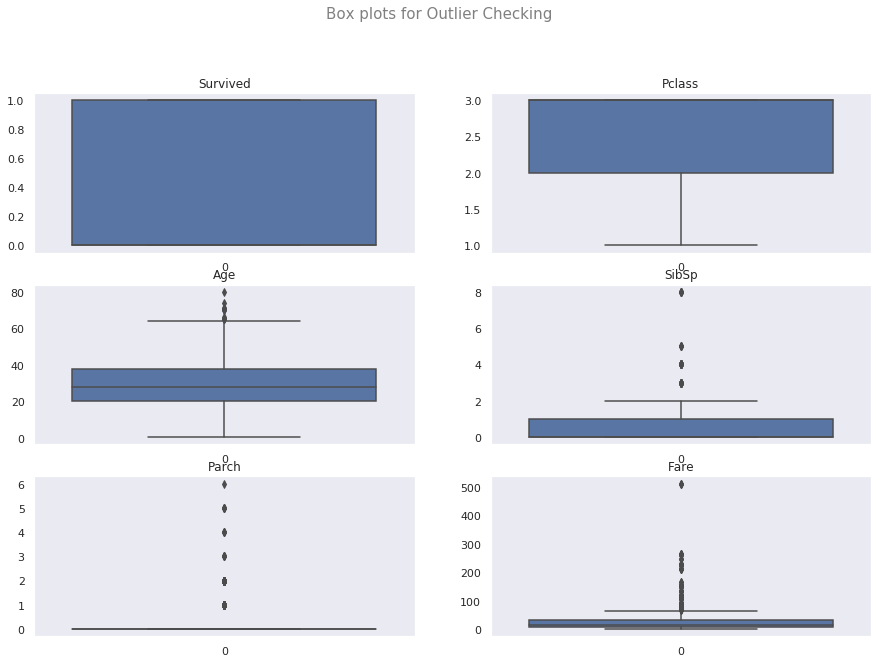

In [0]:
# Checking for Anomalies
#
%matplotlib inline

cols = [col for col in train.columns if col not in ['PassengerId', 'Name', 'Cabin', 'Sex', 'Embarked', 'Ticket']]

data = train[cols]

sns.set(style='dark',context = 'notebook')

# labeling the title

fig,axes = plt.subplots(figsize = (15,10),nrows = 3,ncols = 2)

fig.suptitle('Box plots for Outlier Checking', y= 1, color = 'grey', fontsize = 15)

for ax,col,name in zip(axes.flatten(),data,data.columns):
  
  sns.boxplot(data = data[col],ax = ax)

  ax.set_title(name)

plt.show()


In [0]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   


In [17]:
x = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [19]:
train.loc[x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [26]:
train.Fare.mean()

32.2042079685746

In [0]:
train = train.drop(x, axis = 0).reset_index(drop=True)

OBSERVATION:
- We detect 10 outliers. 

- The 28, 89 and 342 passenger have an high Ticket Fare

- The 7 others have very high values of SibSP.

In [0]:
# Checking for Anomalies
#

print('Train')

train.describe()

Train


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# Test Description

print('Test')

test.describe()

Test


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [0]:
# Identifying existence of missing data in the dataset

print('TRAIN \n')

print(train.isnull().any(), ' \n')

train.isnull().sum()

TRAIN 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool  



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
print('Test \n')

print(test.isnull().any(),' \n')

train.isnull().sum()

Test 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool  



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# Dealing with the Missing Data
#
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Your slelected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [0]:
print('TRAIN: \n')

print(missing_values_table(train),' \n'*3)

missing_values_table(test)

TRAIN: 

Your slelected dataframe has 12 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
Cabin                687              77.10
Age                  177              19.87
Embarked               2               0.22  
 
 

Your slelected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


## 5. Exploratory Analysis

### a. Univariate Analysis

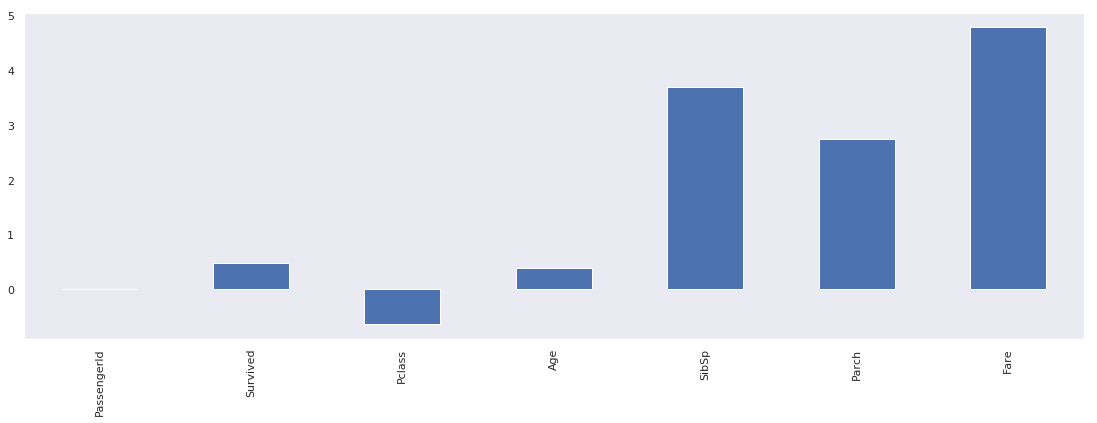

In [0]:
# Calculating Skewness in the columns of our dataset

train.skew().plot.bar(figsize =(19,6))

plt.show()

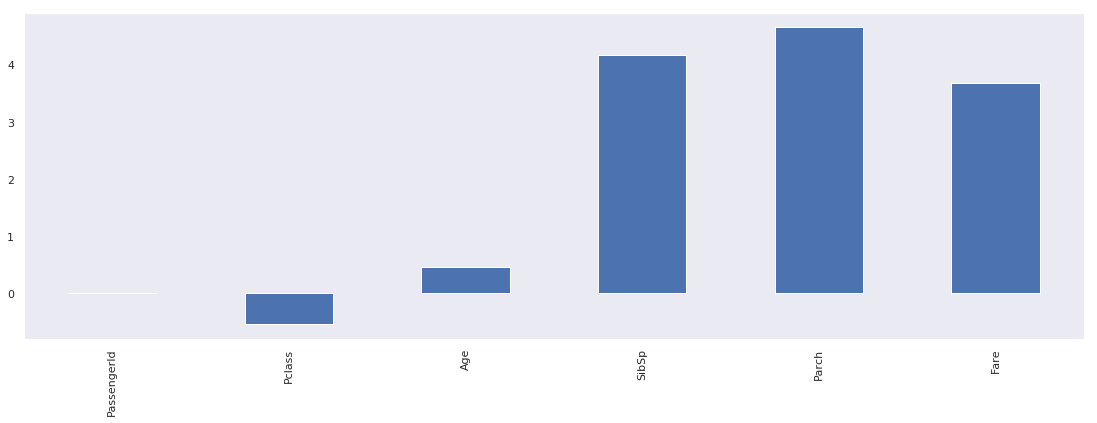

In [0]:
test.skew().plot.bar(figsize =(19,6))

plt.show()

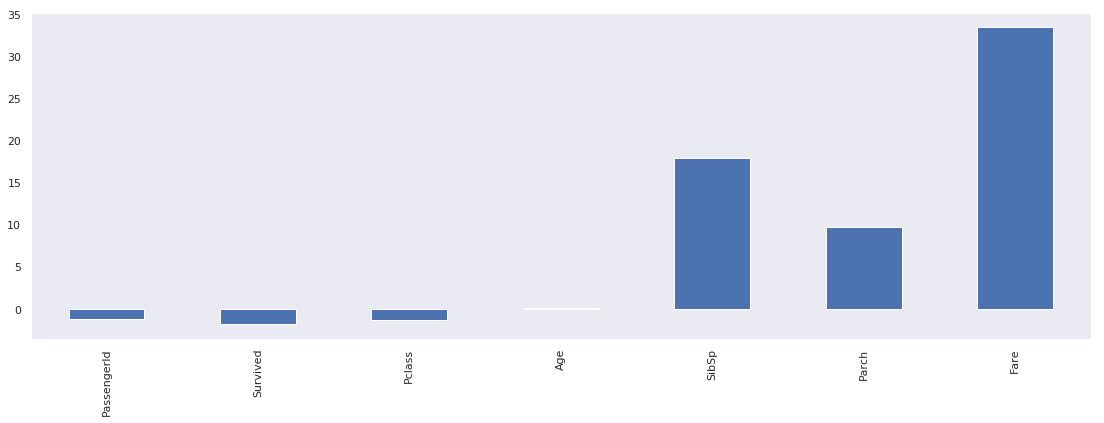

In [0]:
# Measuring curtosis

train.kurt().plot.bar(figsize =(19,6))

plt.show()

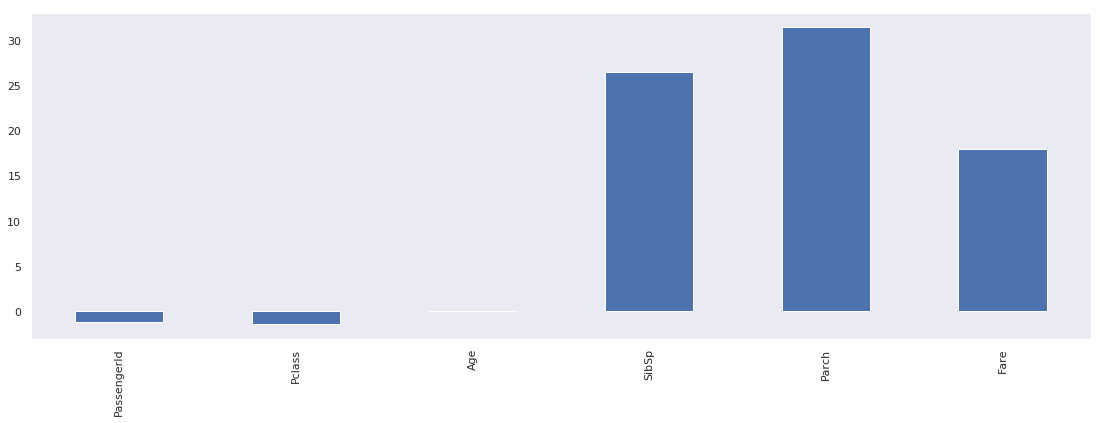

In [0]:
test.kurt().plot.bar(figsize =(19,6))

plt.show()

In [0]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

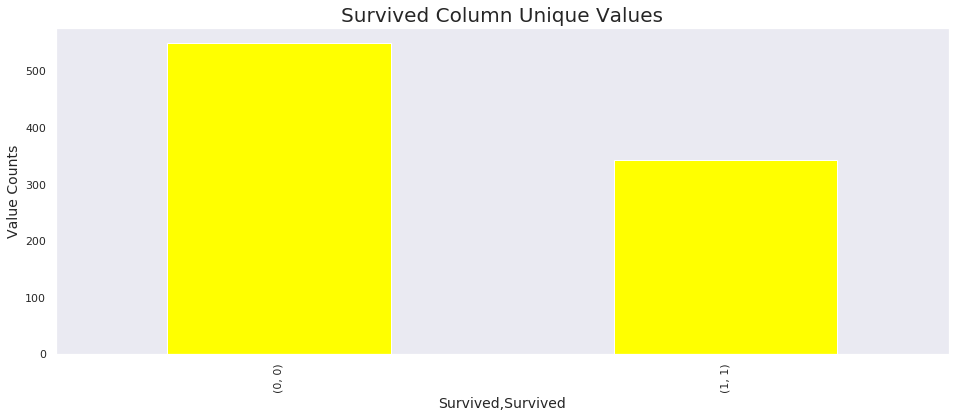

In [0]:
# Unique value counts for tournament column

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.title('Survived Column Unique Values', fontsize = 20)

plt.xlabel('Unique Values', fontsize = 14)

plt.ylabel('Value Counts', fontsize = 14)

train.groupby(['Survived'])['Survived'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'yellow')


plt.show()

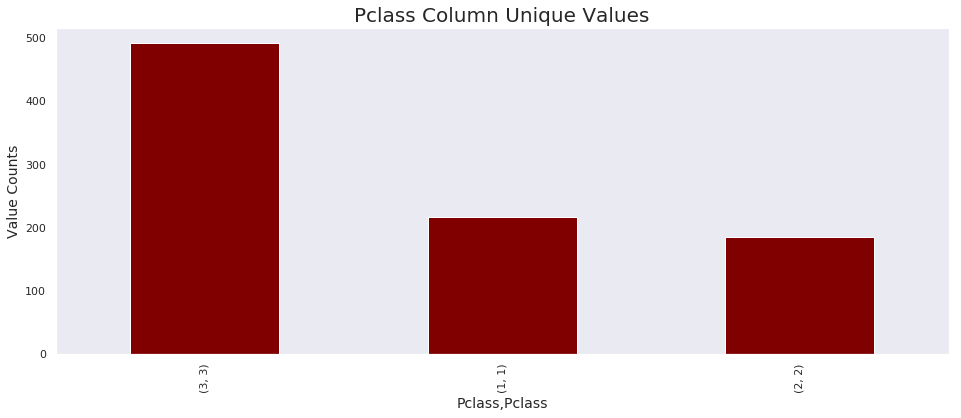

In [0]:
# Unique value counts for tournament column

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.title('Pclass Column Unique Values', fontsize = 20)

plt.xlabel('Unique Values', fontsize = 14)

plt.ylabel('Value Counts', fontsize = 14)

train.groupby(['Pclass'])['Pclass'].value_counts().sort_values(ascending = False).head(12).plot(kind = 'bar', color = 'maroon')


plt.show()

> AGE

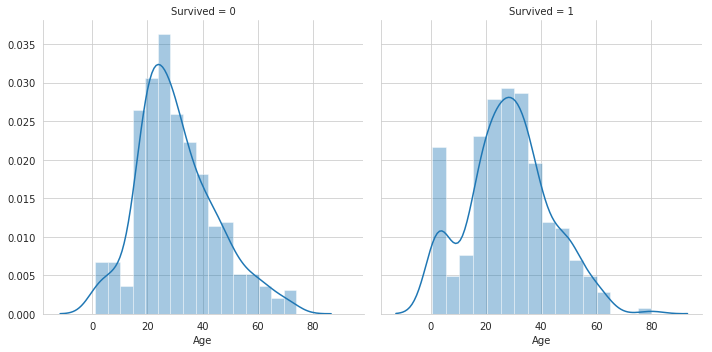

In [76]:
# Explore Age vs Survived

g = sns.FacetGrid(height = (5),data = train, col='Survived')

g.map(sns.distplot, "Age")

plt.show()


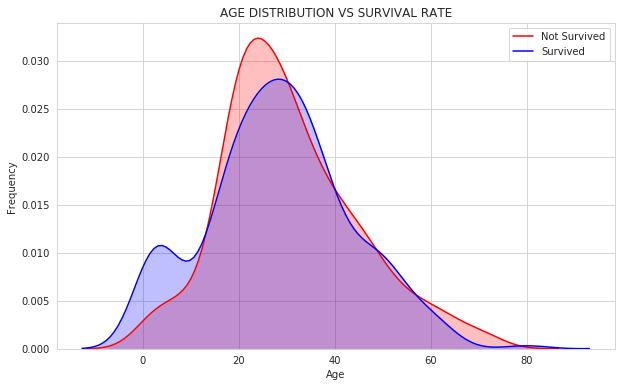

In [73]:
# Explore Age distibution 
plt.figure(figsize= (10,6))

plt.title('AGE DISTRIBUTION VS SURVIVAL RATE')

g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)

g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True,)

g.set_xlabel("Age")

g.set_ylabel("Frequency")

g = g.legend(["Not Survived","Survived"])

**OBSERVATION**

> Children under age 20 were more likely to survive

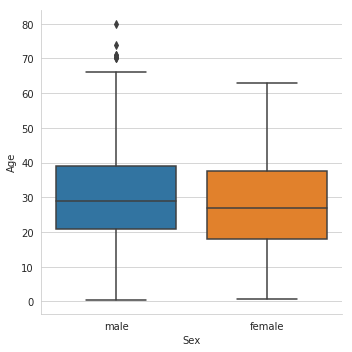

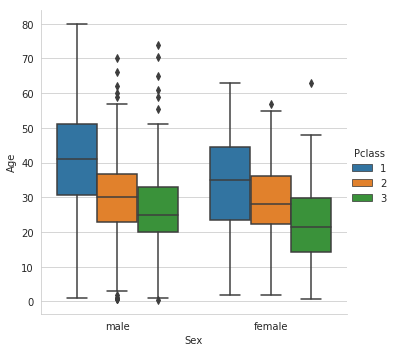

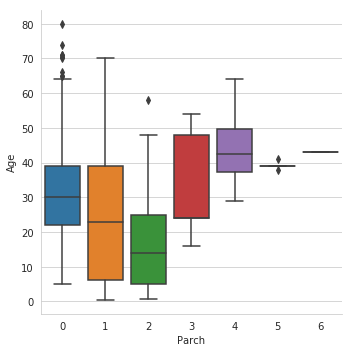

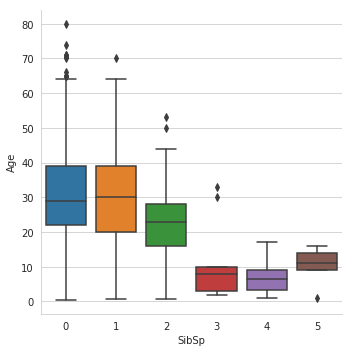

In [94]:
# Age vs Sex, Parch , Pclass and SibSP

sns.catplot(y="Age",x="Sex",data=train,kind="box")

sns.catplot(y="Age",x="Sex",hue="Pclass", data=train,kind="box")

sns.catplot(y="Age",x="Parch", data=train,kind="box")

sns.catplot(y="Age",x="SibSp", data=train,kind="box")

plt.show()

In [96]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age:

    age_med = train["Age"].median()

    age_pred = train["Age"][((train['SibSp'] == train.iloc[i]["SibSp"]) & (train['Parch'] == train.iloc[i]["Parch"]) & (train['Pclass'] == train.iloc[i]["Pclass"]))].median()

    if not np.isnan(age_pred):

        train['Age'].iloc[i] = age_pred

    else:

        train['Age'].iloc[i] = age_med

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


> PCLASS

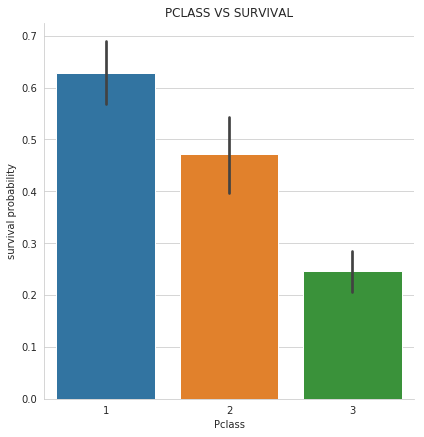

In [86]:


g = sns.catplot(x="Pclass", y="Survived", data=train, kind="bar", height = 6 )

plt.title('PCLASS VS SURVIVAL')

g = g.set_ylabels("survival probability")

**OBSERVATION:**

- Survival probability was highest for those in Pclass 1

### b. Bivariate Analysis

TRAIN: 



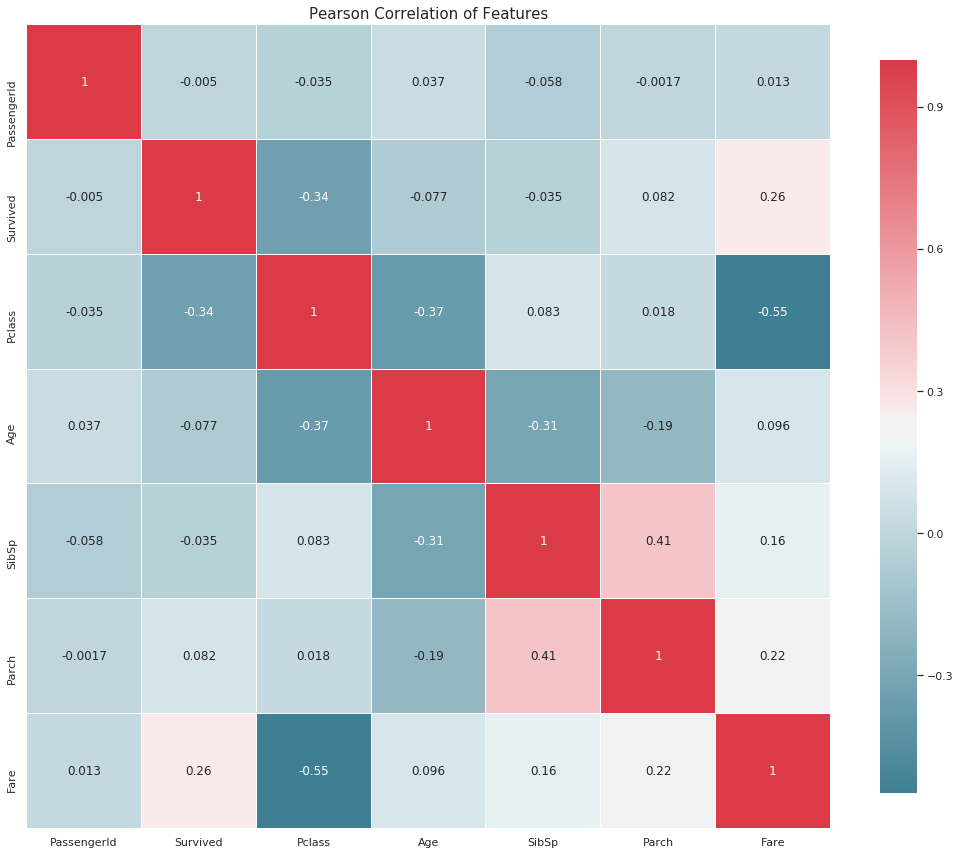

In [0]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(df):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        df.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

print('TRAIN: \n')

correlation_heatmap(train)

TEST: 



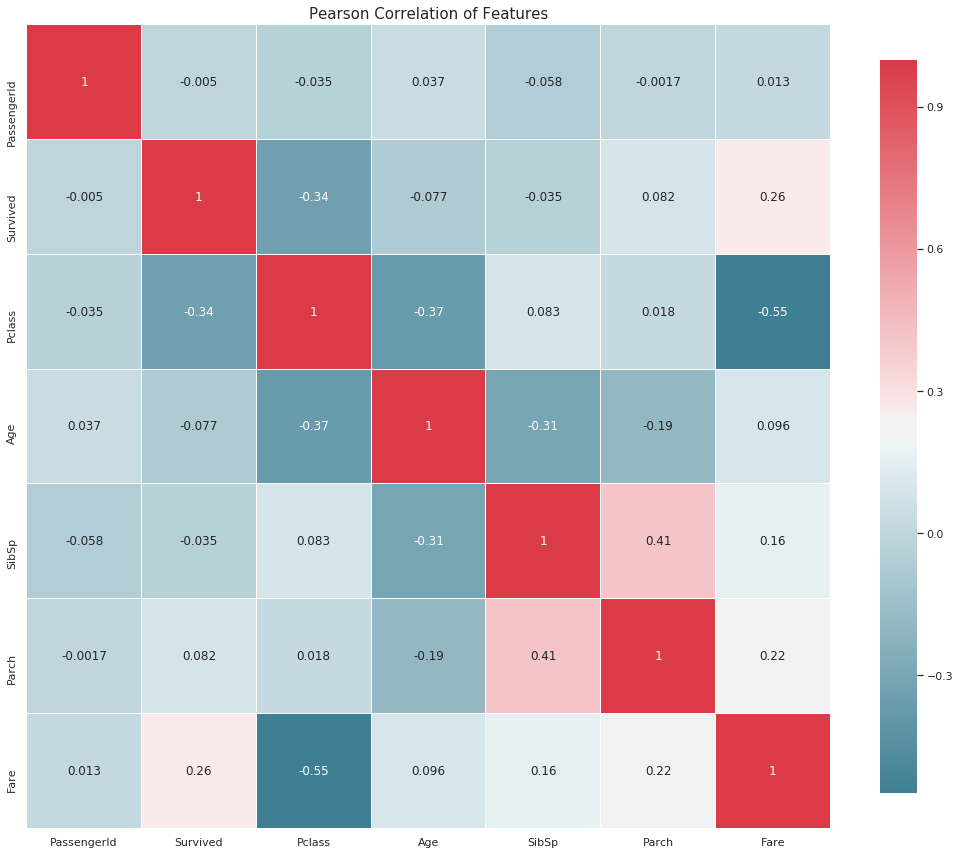

In [0]:
print('TEST: \n')

correlation_heatmap(train)

**OBSERVATION**

- Only Fare feature seems to have a significative correlation with the survival probability.

> FARE & SEX VS SURVIVAL RATE

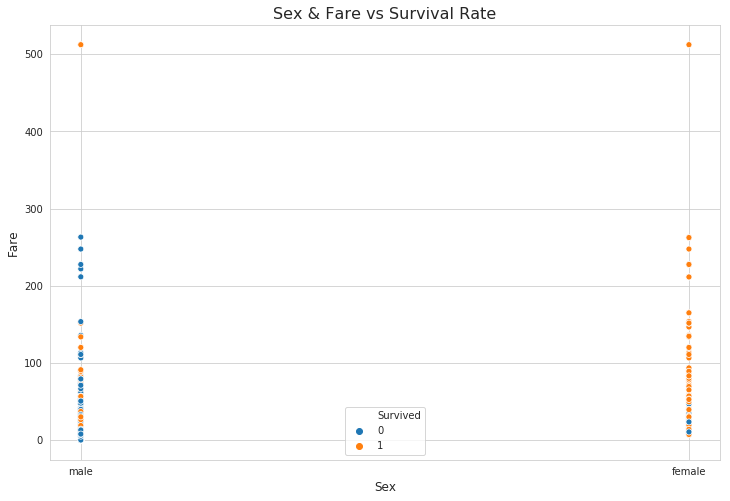

In [42]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,8))

sns.scatterplot(y= 'Fare', x = 'Sex', hue = 'Survived', data = train)

plt.title('Sex & Fare vs Survival Rate', fontsize = 16)

plt.ylabel('Fare', fontsize = 12)

plt.xlabel('Sex', fontsize = 12)

plt.show()

**OBSERVATION**

- Individuals who payed high fare were more likely to survive

- Female individuals had mor chances of surviving than male

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

> Sex & Age vs Survival Rate

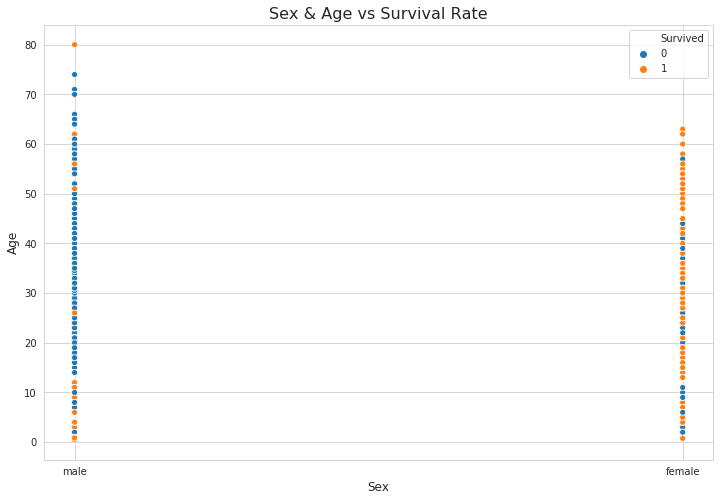

In [47]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,8))

sns.scatterplot(y= 'Age', x = 'Sex', hue = 'Survived', data = train)

plt.title('Sex & Age vs Survival Rate', fontsize = 16)

plt.ylabel('Age', fontsize = 12)

plt.xlabel('Sex', fontsize = 12)

plt.show()

**OBSERVATION**

- Children and the aged were more likely to survive

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1008x1008 with 0 Axes>

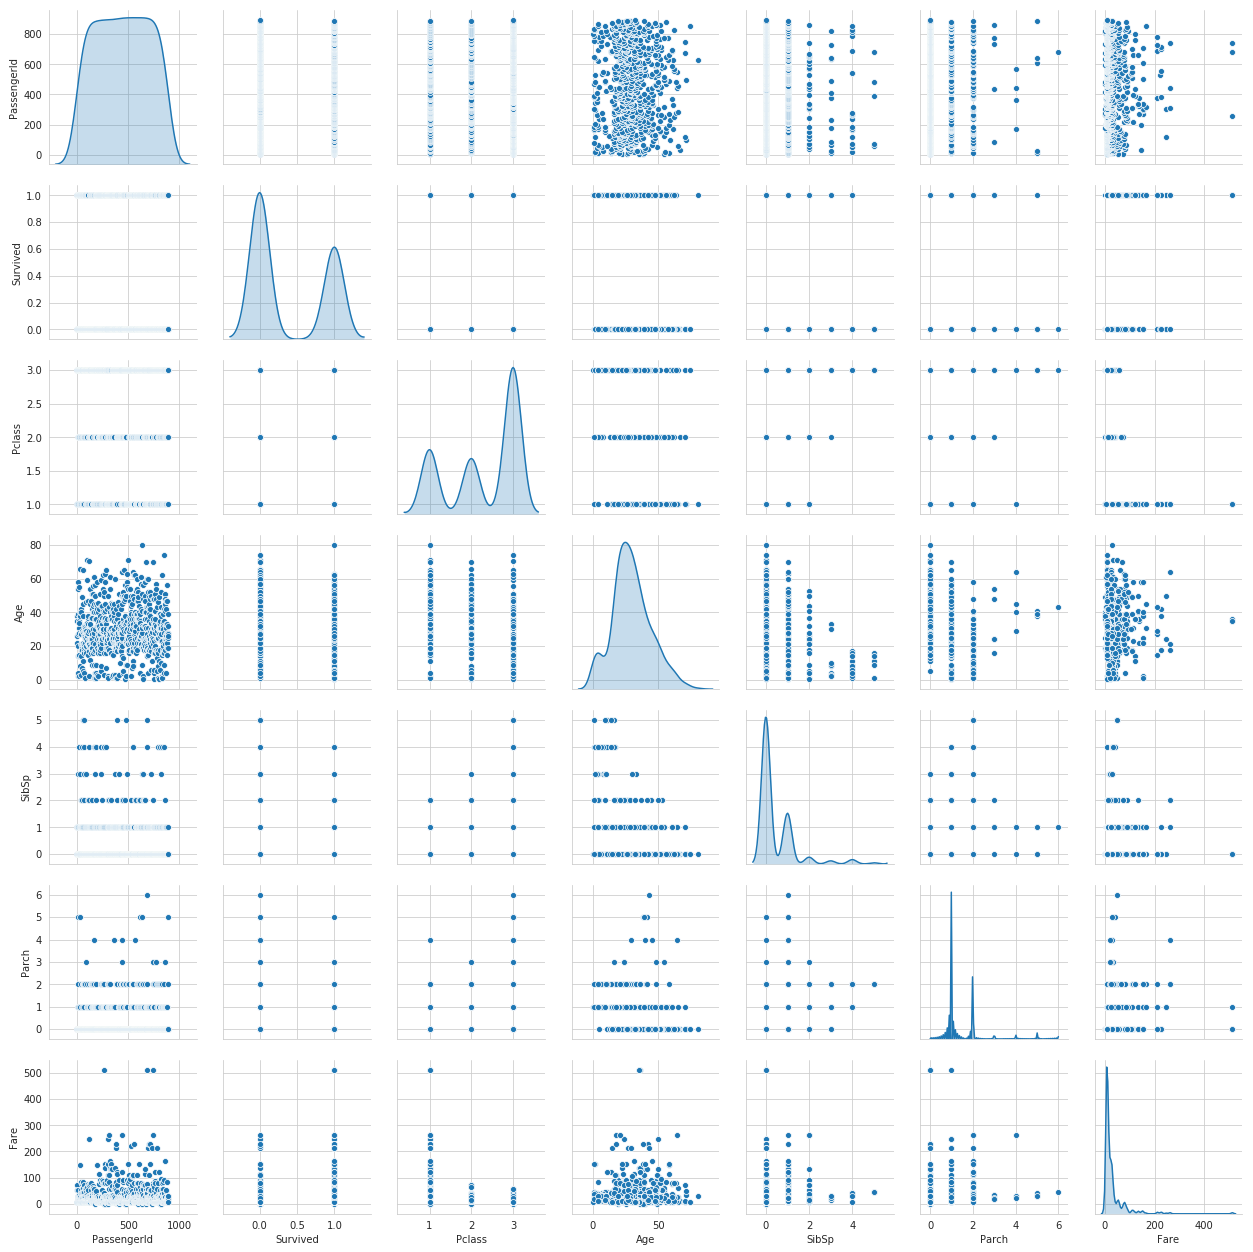

In [43]:
# Crossplots distribution

plt.figure(figsize=(14, 14))

sns.pairplot(train, diag_kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1008x1008 with 0 Axes>

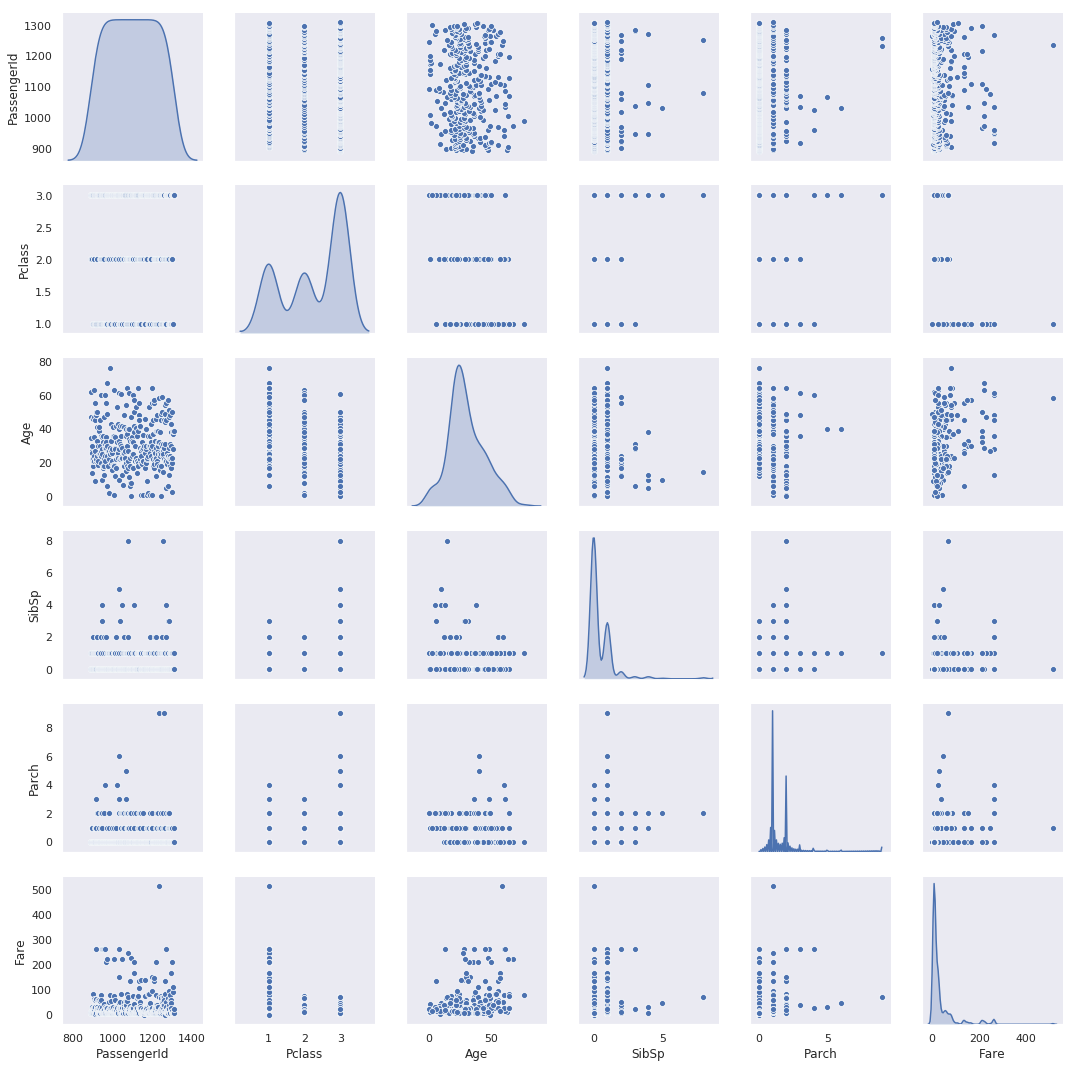

In [0]:
plt.figure(figsize=(14, 14))

sns.pairplot(test, diag_kind='kde');

### c. Multivariate Analysis

#### Getting Dummies for Categorical columns

In [0]:
train.dropna(subset = ['Embarked'],axis = 0,inplace = True)

In [0]:
# CREATING FUNCTION TO CLASS UNIQUE VALUES

def embarked_type(q):
  
  if q == 'S':
    
    return 0
  
  elif q == 'C':
    
    return 1

  elif q == 'Q':
    
    return 2
  
  
train['Embarked'] = train.Embarked.apply(lambda q: embarked_type(q))

test['Embarked'] = test.Embarked.apply(lambda q: embarked_type(q))

In [0]:
test['Embarked'].unique()

array([2, 0, 1])

In [99]:
# Our dataset has variables whose values are in text format.

# For such values to be represented accurately in our analysis plots we shall asign them numeric representatives


dummy = pd.get_dummies(train[['Sex']])

# We shall then merge dummy values to our dataframe

train = pd.concat([train,dummy],axis = 1)

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0


In [100]:
dummy = pd.get_dummies(test[['Sex']])

test = pd.concat([test,dummy],axis = 1)

test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,0


#### Splitting Data Target & Feature sets

In [0]:
# Selecting the columns to be used as data for accuracy testing

cols = [col for col in train.columns if col not in ['Cabin','Ticket','Sex','Name','Survived']]
                                                   

X = train[cols]


#assigning the target column

y = train['Survived']

### Normality test

> ANDERSON DARLING TEST

In [0]:
# Importing anderson function form scipy 

from scipy.stats import anderson

# seed the random number generator

# normality test
data = X.values.flatten()

result = anderson(data)

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

	sl, cv = result.significance_level[i], result.critical_values[i]

	if result.statistic < result.critical_values[i]:

		print('%.3f: %.3f, data looks normal' % (sl, cv))
  
	else:

		print('%.3f: %.3f, data does not look normal' % (sl, cv))
    

Statistic: 1918.883
15.000: 0.576, data does not look normal
10.000: 0.656, data does not look normal
5.000: 0.787, data does not look normal
2.500: 0.917, data does not look normal
1.000: 1.091, data does not look normal


In [0]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)


  

### Testing our Machine Learning Model

### K Nearest Neighbors

In [120]:
# Splitting the dataset into the Training set and Test set
test_sizes = [0.2, 0.3, 0.4]

for size in test_sizes:

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=0)

  model  = KNeighborsClassifier()

  model = model.fit(X_train,y_train)

  pred = model.predict(X_test)

  cm = confusion_matrix(y_test, pred)
  
  acc = accuracy_score(y_test, pred)
  
  print(cm,' \n','Test size: %.1f,  Accuracy: %.2f' % (size,acc*100)+' % \n')

[[92 20]
 [17 47]]  
 Test size: 0.2,  Accuracy: 78.98 % 

[[138  27]
 [ 24  75]]  
 Test size: 0.3,  Accuracy: 80.68 % 

[[178  35]
 [ 38 101]]  
 Test size: 0.4,  Accuracy: 79.26 % 



## 7. Challenging the solution

In [105]:
#predicting with xgboost

model = XGBClassifier(n_estimators=1500,learning_rate =0.25)

model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
# Calculating Feature Importance

print(model.feature_importances_)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

[0.03158589 0.20616335 0.04620324 0.1161139  0.02910815 0.04492056
 0.05207536 0.47382954 0.        ]


,importance
feature,
Sex_female,0.474
Pclass,0.206
SibSp,0.116
Embarked,0.052
Age,0.046
Fare,0.045
PassengerId,0.032
Parch,0.029
Sex_male,0.000


In [0]:
# make predictions for test data

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

In [0]:
# Model Accuracy

model.score(X, y)

1.0

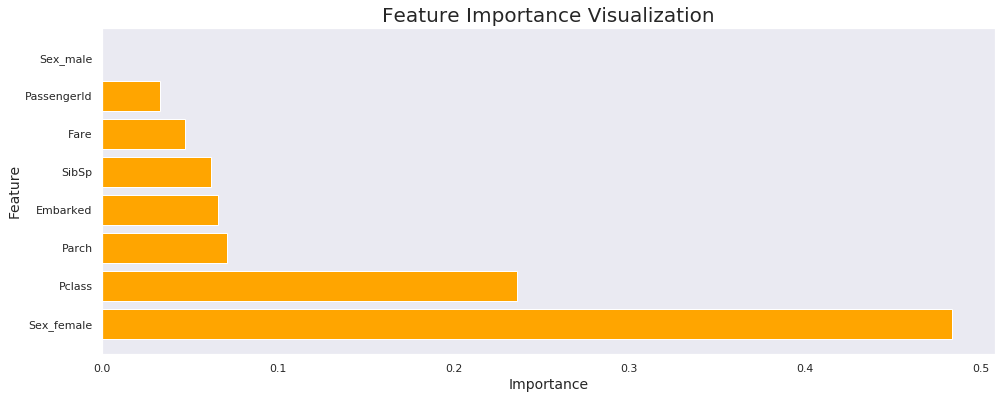

In [0]:
# Feature Importance Visualization

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.barh(importances.index, importances.importance,color = 'orange')

plt.title('Feature Importance Visualization', fontsize = 20)

plt.ylabel('Feature', fontsize = 14)

plt.xlabel('Importance', fontsize = 14)

plt.show()

### Naive Bayes Classifier

> spambase Dataset

In [0]:
spam_train = pd.read_csv('spambase_train_data.csv')

spam_test = pd.read_csv('spambase_test_features.csv')

In [0]:
spam_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00,2.50,0.0,1.50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.43,0.0,1.73,0.43,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,2.7,0.0,0.0,0.0,0.00,0.0,0.00,2.70,0.0,2.70,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,2.35,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.17,1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


In [0]:
cols = [col for col in spam_train.columns if col not in ['Id', 'ham']]
                                                   

X = spam_train[cols]


#assigning the target column

y = spam_train['ham']

In [123]:
# Importing anderson function form scipy 

from scipy.stats import anderson

# seed the random number generator

# normality test
data = X.values.flatten()

result = anderson(data)

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):

	sl, cv = result.significance_level[i], result.critical_values[i]

	if result.statistic < result.critical_values[i]:

		print('%.3f: %.3f, data looks normal' % (sl, cv))
  
	else:

		print('%.3f: %.3f, data does not look normal' % (sl, cv))

Statistic: 75979.481
15.000: 0.576, data does not look normal
10.000: 0.656, data does not look normal
5.000: 0.787, data does not look normal
2.500: 0.918, data does not look normal
1.000: 1.092, data does not look normal


In [0]:
models = [BernoulliNB(),MultinomialNB(),GaussianNB()]

for model, name in zip(models, ['Bernoulli', 'Multinomial', 'Gaussian']):

  model = model

  for size in [0.2, 0.3, 0.4]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=0)

    model = model.fit(X_train,y_train)

    pred = model.predict(X_test)

    acc = accuracy_score(y_test,pred)

    print(name, size, acc,' \n')

Bernoulli 0.2 0.7191011235955056  

Bernoulli 0.3 0.7677902621722846  

Bernoulli 0.4 0.7640449438202247  

Multinomial 0.2 0.5898876404494382  

Multinomial 0.3 0.6179775280898876  

Multinomial 0.4 0.648876404494382  

Gaussian 0.2 0.7303370786516854  

Gaussian 0.3 0.7752808988764045  

Gaussian 0.4 0.7696629213483146  



## Conclusion

> KNN MODEL had an accuracy of 80 highest when split 70-30 

> boosting model performed best with an accuracy of 100

> For spamdata GaussianNB performed best for all splits  despite data not being normally distributed

> The most important variable was Gender Female for XGBoost 